In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib import colors

# Carga de datos

In [ ]:
!wget https://www.dropbox.com/s/2ezl2n6ly4zg3qg/Pokemon.csv

In [23]:
# Crea el dataframe
df_pokemon = pd.read_csv('Pokemon.csv', index_col = 0)
df_pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Exploración inicial

In [3]:
print("Observaciones =",df_pokemon.shape[0])
print("Características =",df_pokemon.shape[1])

Observaciones = 800
Características = 12


In [4]:
df_pokemon.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [5]:
df_pokemon.Name = df_pokemon.Name.str.replace(".*(?=Mega)","")
df_pokemon.columns = df_pokemon.columns.str.lower().str.replace(" ", "")
df_pokemon.columns = df_pokemon.columns.str.lower().str.replace(".", "_")
df_pokemon.set_index("name")

,type1,type2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [6]:
df_pokemon.isna().sum()

name            0
type1           0
type2         386
total           0
hp              0
attack          0
defense         0
sp_atk          0
sp_def          0
speed           0
generation      0
legendary       0
dtype: int64

In [7]:
df_pokemon.drop("type2", axis=1, inplace=True)

## Medidas de tendencia central

In [8]:
df_pokemon.describe()

,total,hp,attack,defense,sp_atk,sp_def,speed,generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [9]:
df_pokemon.describe(include=np.object)

,name,type1
count,800,800
unique,800,18
top,Delcatty,Water
freq,1,112


In [10]:
df_pokemon['legendary'].value_counts()

False    735
True      65
Name: legendary, dtype: int64

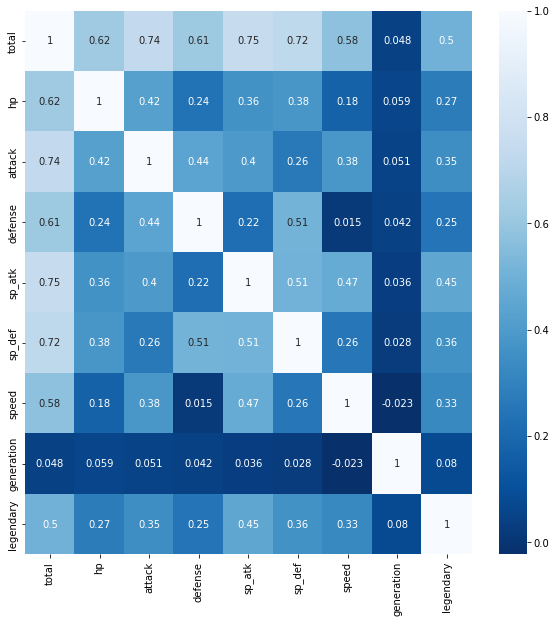

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_pokemon.corr(), annot=True, cmap='Blues_r')
plt.show()

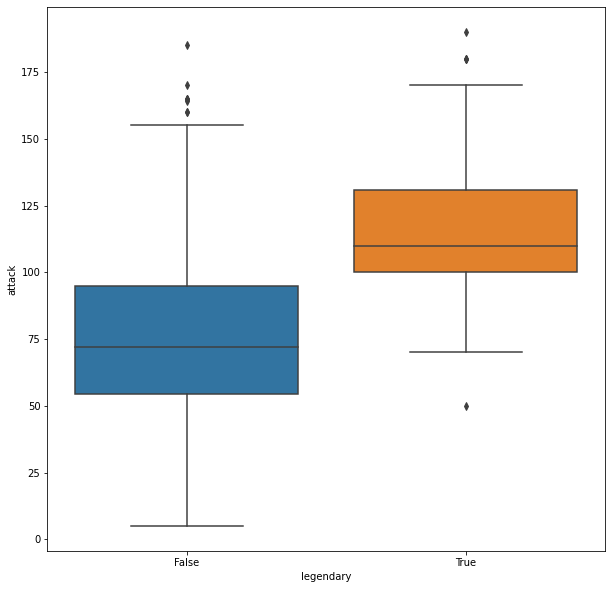

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='legendary', y = 'attack', data=df_pokemon)
plt.show()

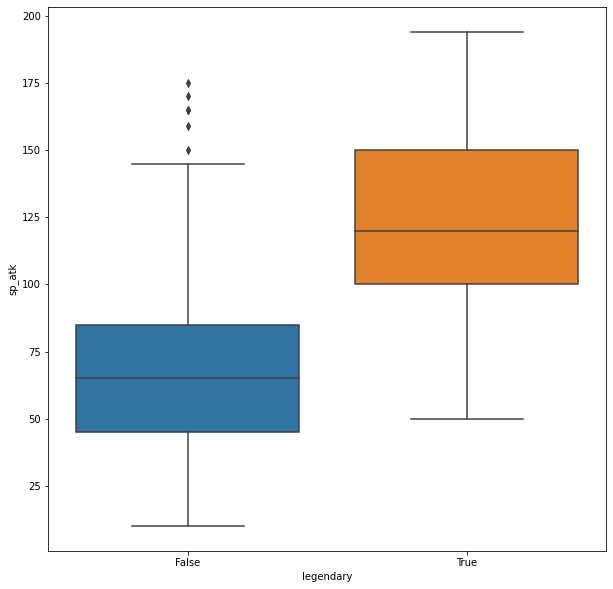

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='legendary', y = 'sp_atk', data=df_pokemon)
plt.show()

# Objetivo planteado

Determinar si un pokemon es legendario o no considerando algunas de sus características.

# Aplicación de Machine Learning

## Modelo simple

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split , KFold, cross_val_score

In [ ]:
features = ['hp','attack','defense','sp_atk','sp_def','speed','generation']
X = df_pokemon[features]
y = df_pokemon.legendary

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=29)

In [ ]:
print("Data para entrenamiento =", X_train.shape[0])
print("Data para prueba =", X_test.shape[0])

Data para entrenamiento = 640
Data para prueba = 160


In [ ]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
predictions = modelo.predict(X_test)
print("Score en entrenamiento : %f " % modelo.score(X_train, y_train))
print("Score en prueba : %f " % modelo.score(X_test, y_test))
print("Accuracy del modelo : %f" % accuracy_score(y_test, predictions))

Score en entrenamiento : 0.950000 
Score en prueba : 0.943750 
Accuracy del modelo : 0.943750


In [ ]:
print(classification_report(y_test, modelo.predict(X_test)))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       148
        True       0.67      0.50      0.57        12

    accuracy                           0.94       160
   macro avg       0.81      0.74      0.77       160
weighted avg       0.94      0.94      0.94       160



In [ ]:
mc = confusion_matrix(y_test, modelo.predict(X_test))
mc

array([[145,   3],
       [  6,   6]])

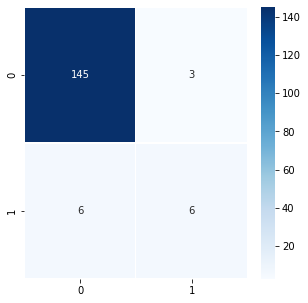

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(mc, fmt='.0f', annot=True, cmap="Blues", linewidths=.3)
plt.show()

## Analizando resultados

Se obtiene un accuracy alto, sin embargo, es ENGAÑOSO, porque el modelo está aprendiendo con un cierto "sesgo" proque las clases (pokemon legendario o no) tienen una diferencia en su distribución en el set de datos.

Lo anterior se justifica por el ***desbalanceo de clases*** que presenta la data.

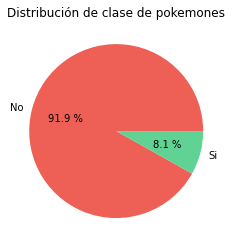

In [20]:
data_c = df_pokemon['legendary'].value_counts()
colores = ["#EE6055","#60D394"] 

plt.pie(data_c, labels=['No','Si'],autopct="%0.1f %%", colors=colores)
plt.title("Distribución de clase de pokemones")
plt.show()

## Mejorando el resultado

Se utiliza un parámetro adicional en el modelo de Regresión logística en donde se indica weight = “balanced” y con esto el algoritmo se encargará de equilibrar a la clase minoritaria durante el entrenamiento.

In [ ]:
def obtener_resultados(modelo, x_test, y_test):
  return classification_report(y_test, modelo.predict(x_test)), confusion_matrix(y_test, modelo.predict(x_test))

In [ ]:
modelo_x = LogisticRegression(class_weight="balanced")
modelo_x.fit(X_train, y_train)
    
pred_y = modelo_x.predict(X_test)

In [ ]:
report, mc = obtener_resultados(modelo_x, X_test, y_test)
print(report)
print(mc)

              precision    recall  f1-score   support

       False       1.00      0.91      0.95       148
        True       0.48      1.00      0.65        12

    accuracy                           0.92       160
   macro avg       0.74      0.96      0.80       160
weighted avg       0.96      0.92      0.93       160

[[135  13]
 [  0  12]]


## Seguimos tratando de mejorar

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

bbc.fit(X_train, y_train)
pred_y = bbc.predict(X_test)

In [ ]:
report, mc = obtener_resultados(bbc, X_test, y_test)
print(report)
print(mc)

              precision    recall  f1-score   support

       False       0.96      0.95      0.95       148
        True       0.43      0.50      0.46        12

    accuracy                           0.91       160
   macro avg       0.69      0.72      0.71       160
weighted avg       0.92      0.91      0.92       160

[[140   8]
 [  6   6]]


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
params = {"max_depth": np.arange(3,6),          # [3,4,5]
          "min_samples_split": np.arange(2,5)}  # [2,3,4]
grid = GridSearchCV(estimator=model, param_grid=params,cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5]),
                     

In [ ]:
print(grid.best_score_)

0.94375


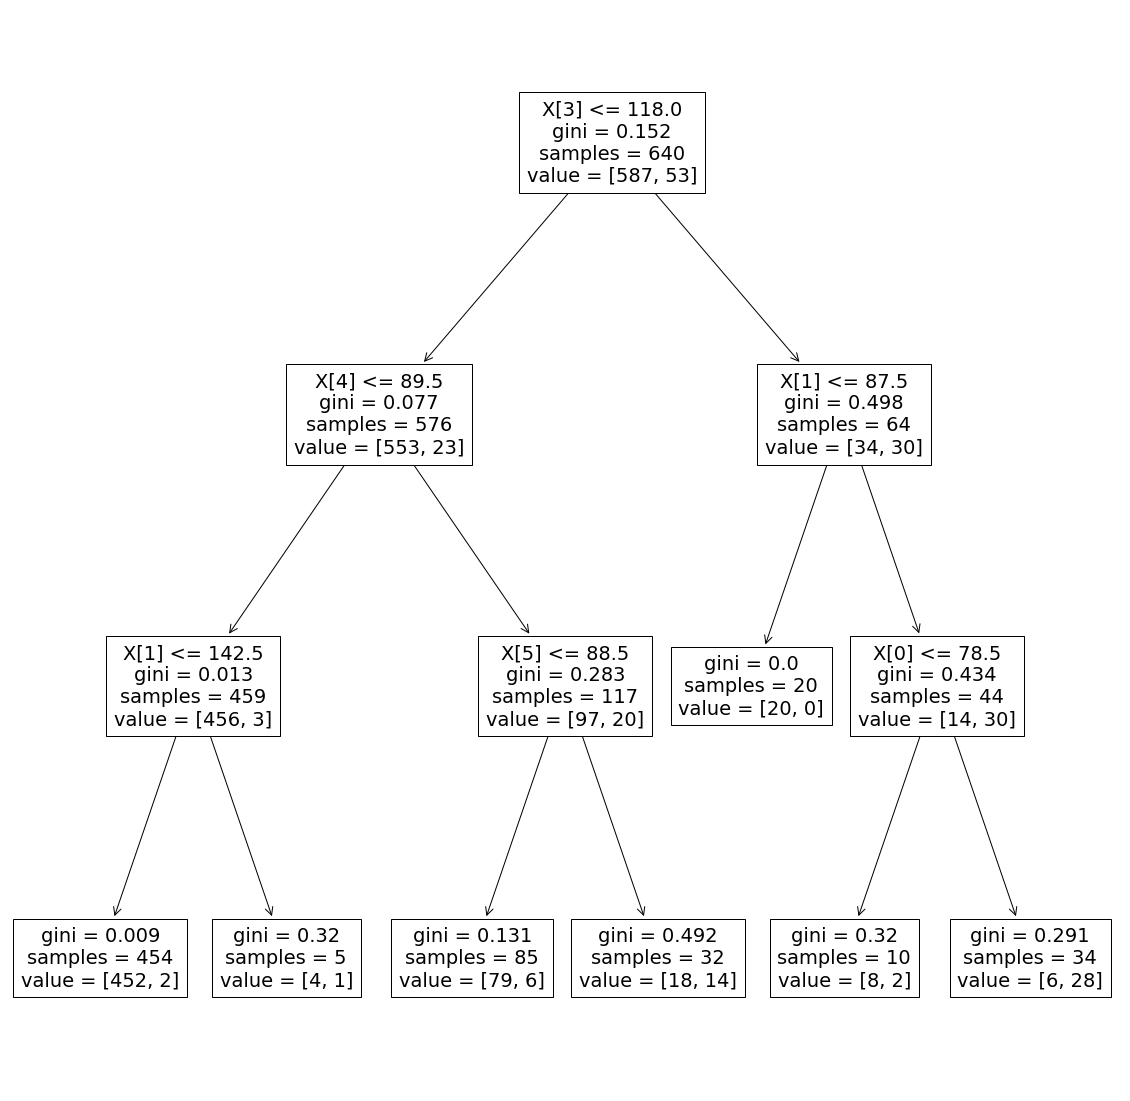

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(20,20))
_= tree.plot_tree(grid.best_estimator_) 

In [ ]:
report, mc = obtener_resultados(grid.best_estimator_, X_test, y_test)
print(report)
print(mc)

              precision    recall  f1-score   support

       False       0.97      0.96      0.96       148
        True       0.54      0.58      0.56        12

    accuracy                           0.93       160
   macro avg       0.75      0.77      0.76       160
weighted avg       0.93      0.93      0.93       160

[[142   6]
 [  5   7]]


In [ ]:
model_x = DecisionTreeClassifier(criterion='entropy')
params = {"max_depth": np.arange(3,6),          # [3,4,5]
          "min_samples_split": np.arange(2,5)}  # [2,3,4]
grid_x = GridSearchCV(estimator=model_x, param_grid=params,cv=10, scoring='accuracy')
grid_x.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5]),
                  

In [ ]:
print(grid_x.best_score_)

0.9359375


In [ ]:
report, mc = obtener_resultados(grid_x.best_estimator_, X_test, y_test)
print(report)
print(mc)

              precision    recall  f1-score   support

       False       0.97      0.96      0.96       148
        True       0.54      0.58      0.56        12

    accuracy                           0.93       160
   macro avg       0.75      0.77      0.76       160
weighted avg       0.93      0.93      0.93       160

[[142   6]
 [  5   7]]


# Más información

Acerca de gini y entropy (https://quantdare.com/decision-trees-gini-vs-entropy/)